In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
palette = 'muted'
sns.set_palette(palette); sns.set_color_codes(palette)
sns.set()

# 二項分布を例にした、事後確率の分布について

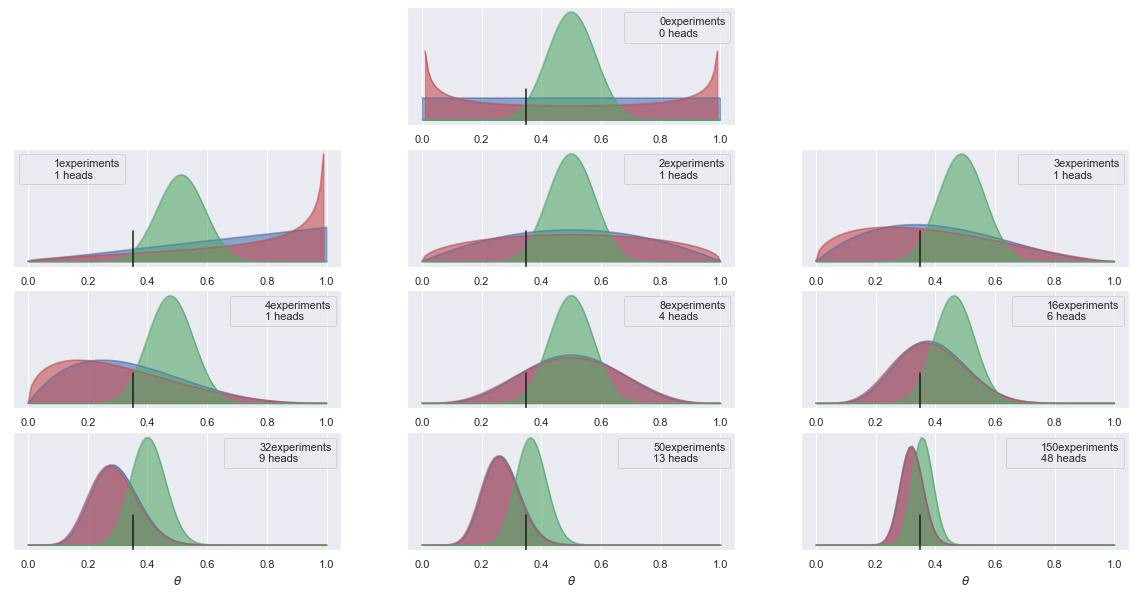

In [25]:
# 本当のthetaの値(実際はわからない)
theta_real = 0.35 

# 試行回数
trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
# 観測された値
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]

# 事前分布のパラメータ
beta_params=[(1,1),(0.5,0.5),(20,20)]

# 事前分布
dist=stats.beta
# 事前分布の確率変数
x=np.linspace(0,1,100)


plt.figure(figsize=(20,10))
for idx,N  in enumerate(trials):
    if idx==0:
        plt.subplot(4,3,2)
    else:
        plt.subplot(4,3,idx+3)
    
    # idx回目の試行で観測された値
    y=data[idx]
    for (a_pri,b_pri),c in zip(beta_params,list('brg')):
        
        # 事後分布(更新された後の事後分布)
        p_theta_given_y=dist.pdf(x,a_pri+y,b_pri+N-y)

        plt.plot(x,p_theta_given_y,color=c,alpha=0.6)
        plt.fill_between(x,0,p_theta_given_y,color=c,alpha=0.6) 
    
    plt.axvline(theta_real,ymax=0.3,color='k')
    
    plt.plot(0,0,label=f'{N:d}experiments\n{y:d} heads',alpha=0)
    plt.legend()
    plt.xlabel('$\\theta$')
    plt.gca().axes.get_yaxis().set_visible(False)
        
        

# HPD(確信区間)の可視化

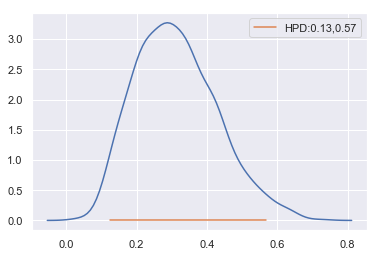

In [34]:
def naive_hpd(post,ratio=97):
    sns.kdeplot(post)
    lower_ratio=(100-ratio)/2
    upper_ratio=100-lower_ratio
    
    HPD=np.percentile(post,[lower_ratio,upper_ratio])
    plt.plot(HPD,[0,0],label='HPD:{:.2f},{:.2f}'.format(*HPD))
    plt.legend()
    
np.random.seed(1)
post=stats.beta.rvs(5,11,size=1000)
naive_hpd(post,95)



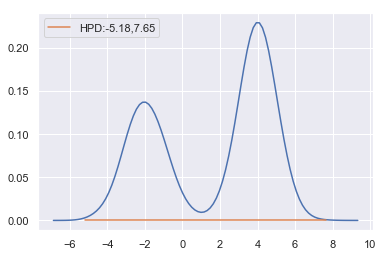

In [36]:
gauss_a = stats.norm.rvs(loc=4, scale=0.9, size=3000)
gauss_b = stats.norm.rvs(loc=-2, scale=1, size=2000)
mix_norm = np.concatenate((gauss_a, gauss_b))
naive_hpd(mix_norm,100)

array([3, 3, 3])